In [109]:
from sklearn import datasets
import numpy as np

In [110]:
iris = datasets.load_iris()
X = iris["data"][:,3:]  # petal width
#X = iris["data"][:,:]  # petal width
y = (iris["target"]==2).astype(np.int)
X.shape, y.shape

((150, 1), (150,))

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((108, 1), (27, 1), (15, 1))

In [112]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [113]:
def binary_loss(X, Y, weights, alpha=0.00001):
    """
    X.shape = (num_instances, num_features)
    Y.shape = (num_instances,)
    weights.shape = (num_features,)
    """
    z = np.dot(X, weights)
    h = sigmoid(z)
    total_cost = (-Y*np.log(h) - (1-Y)*np.log(1-h)).mean() + alpha * np.sum(np.dot(weights, weights.T))
    return total_cost

### `np.dot()`
I don't use `np.dot()` often. Instead, I use matrix product more often (`@`). Let's review what `np.dot()` does.

In [114]:
X = np.random.rand(10, 3)
weights = np.random.rand(3)
X.shape, weights.shape

((10, 3), (3,))

In [115]:
z = np.dot(X, weights)
z.shape

(10,)

In [116]:
(X @ weights).shape, sigmoid(X @ weights).shape 

((10,), (10,))

In [117]:
np.dot(weights, weights.T)

0.833945209486306

In [118]:
np.sum(np.dot(weights, weights.T)) == weights.T @ weights

True

### Back to Yang Wang's code

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.1, alpha=0.00001, epochs=5, tolerance=0.0001, print_progress=True):
    train_loss_history, val_loss_history = [], []
    num_features = X_tr.shape[1]
    weights = np.zeros(shape=(num_features,), dtype=np.float64)
    clip_value = 1e-9
    X_tr = np.clip(X_tr, clip_value, 1-clip_value)
    mms = MinMaxScaler()
    #mms = StandardScaler()
    X_tr = mms.fit_transform(X_tr)
    for epoch in range(epochs):
        indices = np.arange(X_tr.shape[0])
        np.random.shuffle(indices)
        X_tr = X_tr[indices]
        Y_tr = Y_tr[indices]

        # training loop
        train_loss = 0
        for idx, row in enumerate(X_tr):
            row = np.reshape(row, (1, num_features))
            train_loss += binary_loss(row, Y_tr[idx], weights, alpha)
            for i in range(len(row)):
                gradient = (sigmoid(row @ weights) - float(Y_tr[idx])) * row[0, i] + alpha*weights[i]
                weights[i] = weights[i] - lr*gradient
        train_loss /= X_tr.shape[0]
        train_loss_history.append(train_loss)

        if len(X_dev) != 0 and len(Y_dev) != 0:
            X_dev = mms.transform(X_dev)
            val_loss = binary_loss(X_dev, Y_dev, weights, alpha)
            val_loss_history.append(val_loss)

            if print_progress:
                print(f"Epoch: {epoch+1}")
                print(f"Training loss:   {train_loss:.4f}")
                print(f"Validation loss: {val_loss:.4f}")

            # Stopper training des que val_loss ne decroit plus.
            if epoch >=1:
                if np.abs(val_loss_history[epoch]-val_loss_history[epoch-1]) < tolerance:
                    break

    return weights, train_loss_history, val_loss_history

In [120]:
n_epochs = 100
w, train_hist, val_hist = SGD(X_train, y_train, X_dev=X_val, Y_dev=y_val, epochs=n_epochs, print_progress=False)

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid valu

/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/phunc20/.config/miniconda3/envs/homl-1e/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountere

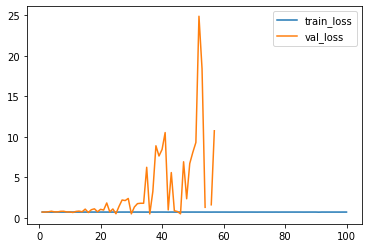

In [121]:
import matplotlib.pyplot as plt
x = range(1, len(train_hist)+1)
plt.plot(x, train_hist, label="train_loss")
plt.plot(x, val_hist, label="val_loss")
plt.legend();

In [122]:
#prediction = 